[View in Colaboratory](https://colab.research.google.com/github/sdevika/MLBootCamp/blob/master/lab1_partB.ipynb)

## Lab 1: Part 2: Implementing regularized linear regression 
In this part, you will implement regularized linear regression and use it to
study models with different bias-variance properties. 

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Regularized Linear Regression cost function and gradient
Below is an implementation of the loss function and gradient of the
loss function for regularized linear regression on multiple predictors. 
Regularized linear regression has the following cost function:
$$J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} {( y^{(i)} - h_\theta(x^{(i)})}^2\right) + \frac{\lambda}{2m}\left( \sum_{j=1}^{n} {\theta_j}^2 \right) $$
where $\lambda$ is a regularization parameter which controls the degree of regularization
(thus, help preventing overfitting). The regularization term puts
a penalty on the overall cost $J(\theta)$. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term.  Note the vectorized code.

Correspondingly, the partial derivative of the regularized linear regression  cost function
with respect to  $\theta_j$ is defined as:
\begin{eqnarray*}
\frac{\partial J(\theta)}{\partial \theta_0} & = & \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}){x_j}^{(i)} \\
\frac{\partial J(\theta)}{\partial \theta_j} & = & \left(\frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)} ){x_j}^{(i)}\right) + \frac{\lambda}{m}{\theta_j} \; \; \; \mbox{ for }j \geq 1\\
\end{eqnarray*}

In [0]:
import numpy as np
import scipy

class RegularizedLinearRegressor_Multi:

    def __init__(self):
        self.theta = None


    def train(self,X,y,reg=1e-5,num_iters=100):

        """
        Train a linear model using regularized  gradient descent.
        
        Inputs:
        - X: N X D array of training data. Each training point is a D-dimensional
         row.
        - y: 1-dimensional array of length N with values in the reals.
        - reg: (float) regularization strength.
        - num_iters: (integer) number of steps to take when optimizing


        Outputs:
        optimal value for theta
        """
    
        num_train,dim = X.shape
        theta = np.ones((dim,))

        # Run scipy's fmin_cg algorithm to run the gradient descent
        theta_opt = scipy.optimize.fmin_bfgs(self.loss, theta, fprime = self.grad_loss, args=(X,y,reg),maxiter=num_iters)
                    
        return theta_opt

    def loss(self, *args):
        """
        Compute the loss function and its derivative. 
        Subclasses will override this.

        Inputs:
        - X: N x D array of data; each row is a data point.
        - y: 1-dimensional array of length N with real values.
        - reg: (float) regularization strength.

        Returns: A tuple containing:
        - loss as a single float
        - gradient with respect to self.theta; an array of the same shape as theta
        """
        
        pass

    def grad_loss(self, *args):
        """
        Compute the loss function and its derivative. 
        Subclasses will override this.

        Inputs:
        - X: N x D array of data; each row is a data point.
        - y: 1-dimensional array of length N with real values.
        - reg: (float) regularization strength.

        Returns: A tuple containing:
        - loss as a single float
        - gradient with respect to self.theta; an array of the same shape as theta
        """
        pass

    def predict(self, X):
        """
        Use the trained weights of this linear classifier to predict labels for
        data points.

        Inputs:
        - X: N x D array of training data. Each row is a D-dimensional point.

        Returns:
        - y_pred: Predicted output for the data in X. y_pred is a 1-dimensional
        array of length N, and each element is a real number.
        """
        
        y_pred = np.dot(X,self.theta)
        
        return y_pred

    def normal_equation(self,X,y,reg):
        """
        Solve for self.theta using the normal equations.
        """
        return np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

class RegularizedLinearReg_SquaredLoss(RegularizedLinearRegressor_Multi):
    "A subclass of Linear Regressors that uses the squared error loss function """

    """
    Function that returns loss and gradient of loss with respect to (X, y) and
    self.theta
        - loss J is a single float
        - gradient with respect to self.theta is an array of the same shape as theta

    """

    def loss (self,*args):
        theta,X,y,reg = args

        num_examples,dim = X.shape
        J = 0
        grad = np.zeros((dim,))
        
        error = np.dot(X,theta)- y
        J = np.dot(error,error)/(2*num_examples) + reg*np.dot(theta[1:], theta[1:])/(2*num_examples)
        
        return J

    def grad_loss(self,*args):                                                                          
        theta,X,y,reg = args

        num_examples,dim = X.shape
        grad = np.zeros((dim,))
        error = np.dot(X,theta)- y
        grad = np.dot(X.T,error)/num_examples + reg/num_examples * theta
        grad[0] = grad[0] - reg/num_examples * theta[0]
       
        return grad

### Regularized linear regression: an example
In this problem, you will use regularized linear regression
to predict the amount of water flowing out of a dam using the change
of water level in a reservoir. We will begin by visualizing the dataset containing historical records on the
change in the water level $x$, and the amount of water $y$, flowing out of the dam.
This dataset is divided into three parts:
- A training set that you will use to learn the model:  X,  y.
- A validation set for determining the regularization parameter: Xval, yval.
- A test set for evaluating the performance of your model:  Xtest, ytest. These are unseen examples that were not used during the training of the model.

Run the cell below and it  will plot the training data as shown in Figure 6 in your assignment handout. 

Loading and Visualizing Data ...


Text(0,0.5,u'Water flowing out of the dam (y)')

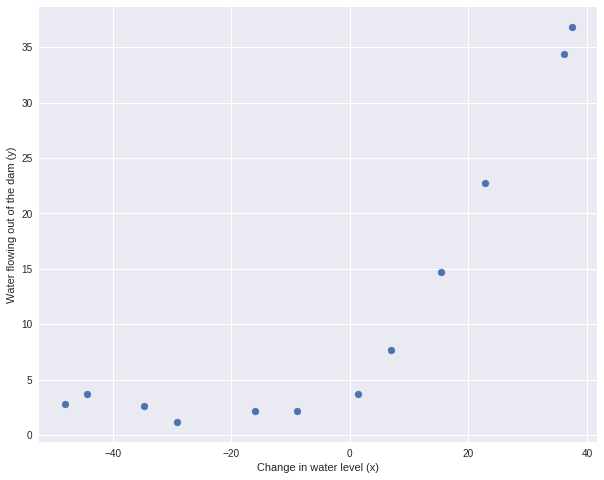

In [10]:
# do this once to get all the files
#!git clone https://github.com/sdevika/MLBootCamp.git

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

########################################################################
## =========== Part 1: Loading and Visualizing Data ===================#
########################################################################
# Load Training Data

def load_mat(fname):
  d = scipy.io.loadmat(fname)
  X = d['X']
  y = d['y']
  Xval = d['Xval']
  yval = d['yval']
  Xtest = d['Xtest']
  ytest = d['ytest']
  return X,y,Xtest,ytest,Xval,yval

print 'Loading and Visualizing Data ...'

X, y, Xtest, ytest, Xval, yval = load_mat('MLBootCamp/ex2data1.mat')
X,y,Xtest,ytest,Xval,yval = np.hstack(X), np.hstack(y),np.hstack(Xtest), np.hstack(ytest),np.hstack(Xval), np.hstack(yval)

# Plot training data

plt.scatter(X,y)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')


### Building a Regularized Linear Regression model

The cell below runs the train method to compute the optimal value
of $\theta$. This training function uses scipy's fmin_bfgs to optimize the cost function.
Here we have set the regularization parameter $\lambda$ to zero. 

The best fit line plotted by the script  tells us that the model is
not a good fit to the data because the data is non-linear. While
visualizing the best fit as shown is one possible way to debug your learning
algorithm, it is not always easy to visualize the data and model. In the next
cell, you will implement a function to generate learning curves that can
help you debug your learning algorithm even if it is not easy to visualize the
data.

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Theta at lambda = 0 is  [13.08790353  0.36777923]


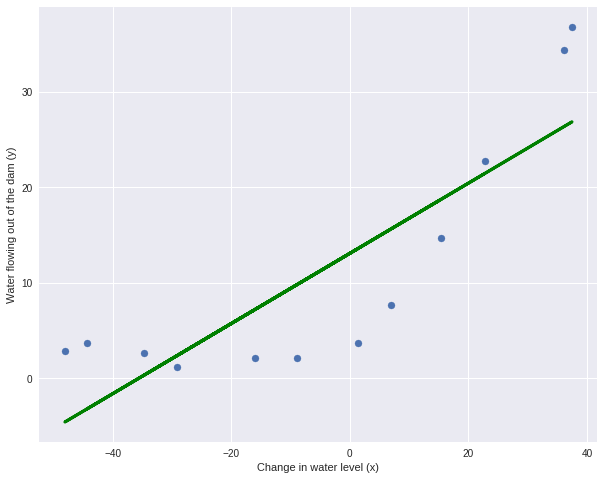

In [12]:
# append a column of ones to matrix X

XX = np.vstack([np.ones((X.shape[0])),X]).T

#  Train linear regression with lambda = 0

reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX,y,reg=0.0,num_iters=1000)
print 'Theta at lambda = 0 is ', theta_opt0

# plot fit over data and show it (or save it in fig7.pdf)
plt.scatter(X,y)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X,np.dot(XX,theta_opt0),'g-',linewidth=3)


### Learning curve for linear regression
An important concept in machine learning is the bias-variance tradeoff. Models
with high bias are not complex enough for the data and tend to underfit,
while models with high variance overfit  the training data.
Here you will plot training and test errors on a
learning curve to diagnose bias-variance problems.

A  learning curve plots
training and cross validation error as a function of training set size. We give you the
function  learning_curve  which returns a vector of errors for the
training set and  validation set.
To obtain different training set sizes,
we use different subsets of the original training set X. Specifically, for
a training set size of $i$, we should use the first $i$ examples.

We use the train function to find the parameter {\tt theta}. Note
that the regularization $\lambda$  is passed as a parameter to the learning_curve function.
After learning the $\theta$ parameter, we compute the error on the training
and validation sets. Recall that the training error for a dataset is
defined as:
$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} {( y^{(i)} - h_\theta(x^{(i)})}^2\right)  $$


In particular, note that the training error does not include the regularization
term. One way to compute the training error is to use the existing
cost function and set the regularization parameter reg to 0 only when using it to compute the training error
and validation error. When computing the training set error,
we compute it on the training subset
instead of the entire training set. However, for the validation error,
we compute it over the entire validation set. We store
the computed errors in the vectors error_train and error_val.
When  finished, the cell below will print the learning curves.

Optimization terminated successfully.
         Current function value: 0.001307
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 3.335017
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 2.881847
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.174273
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.461396
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.112149
         Iterations: 4
         Function evaluations: 5
         Grad

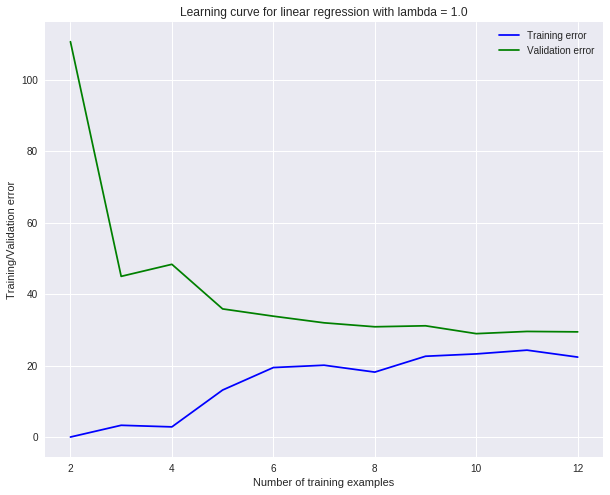

In [15]:
reg = 1.0
XXval = np.vstack([np.ones((Xval.shape[0],)),Xval]).T

def learning_curve(X,y,Xval,yval,reg):
    num_examples,dim = X.shape
    error_train = np.zeros((num_examples,))
    error_val = np.zeros((num_examples,))
    for i in range(1,num_examples):
        trainX = X[:i+1]
        trainy = y[:i+1]
        reglinear_reg = RegularizedLinearReg_SquaredLoss()
        theta_opt = reglinear_reg.train(trainX,trainy,reg=reg,num_iters=100000)
        error_train[i] = reglinear_reg.loss(theta_opt,trainX,trainy,0.0)
        error_val[i] = reglinear_reg.loss(theta_opt,Xval,yval,0.0)
    return error_train, error_val

def plot_learning_curve(error_train,error_val,reg):
    plt.figure()
    xvals = np.arange(2,len(error_train)+1)
    plt.plot(xvals,error_train[1:],'b-',xvals,error_val[1:],'g-')
    plt.title('Learning curve for linear regression with lambda = '+str(reg))
    plt.xlabel('Number of training examples')
    plt.ylabel('Training/Validation error')
    plt.legend(["Training error","Validation error"])

error_train, error_val = learning_curve(XX,y,XXval,yval,reg)

plot_learning_curve(error_train, error_val,reg)


### Polynomial regression: expanding the basis functions
The problem with our linear model was that it was too simple for the data
and resulted in underfitting (high bias). In this problem, you will address this issue by adding more features. In particular, you will consider hypotheses of the form
$$ h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_p x^p $$
This is still a linear model from the point of view of the parameter space. We have augmented the features with powers of $x$.
Code in the cell below builds these features using sklearn's preprocessing module. 

We use a polynomial of degree 6.
It turns out that if we run the training directly on the projected data,  it will
not work well as the features would be badly scaled (e.g., an example with
$x = 40$ will now have a feature $x^6 = 40^6 = 4.1 \times 10^{9}$). Therefore, we
do feature normalization.

In [0]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures

def feature_normalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Map X onto polynomial features and normalize
# We will consider a 6th order polynomial fit for the data

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(np.reshape(X,(len(X),1)))
X_poly, mu, sigma = feature_normalize(X_poly)

# add a column of ones to X_poly

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# map Xtest and Xval into the same polynomial features

X_poly_test = poly.fit_transform(np.reshape(Xtest,(len(Xtest),1)))
X_poly_val = poly.fit_transform(np.reshape(Xval,(len(Xval),1)))

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T

### Learning curves for polynomial regression
The cell below trains a linear model on the transformed data. After learning $\theta$, you should see two plots 
generated for polynomial regression with $\lambda= 0$.

Optimization terminated successfully.
         Current function value: 0.198053
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Theta at lambda = 0 is  [ 11.21758977  10.88676468  12.86207254  10.28506173  -4.20098901
 -11.4141408   -4.90366713]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated su

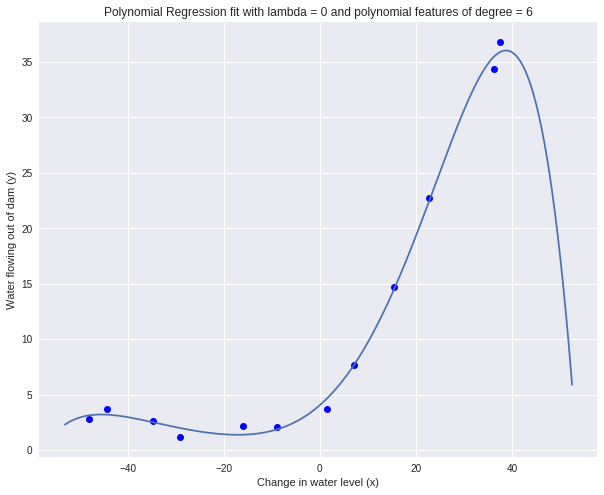

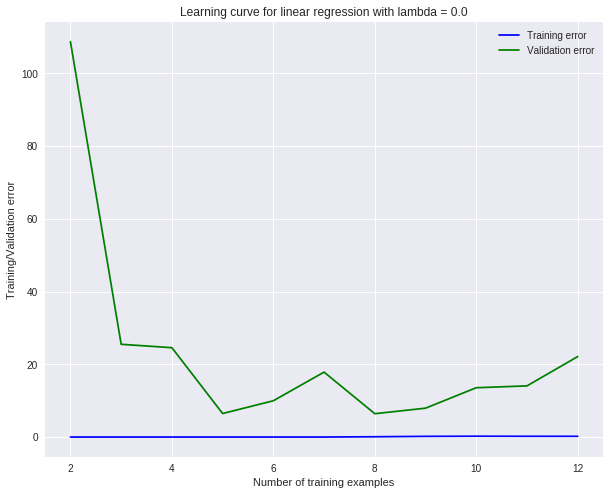

In [17]:
reg = 0.0
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg1.train(XX_poly,y,reg=reg,num_iters=10000)
print 'Theta at lambda = 0 is ', theta_opt1


# plot data and training fit for the 6th order polynomial 

def plot_fit(X,y,minx, maxx, mu, sigma, theta, p, xlabel, ylabel, title):

    plt.figure()
    plt.plot(X,y,'bo')

    # plots a learned polynomial regression fit 

    x = np.arange(minx - 5,maxx+15,0.1)
    # map the X values
    poly = sklearn.preprocessing.PolynomialFeatures(p,include_bias=False)
    x_poly = poly.fit_transform(np.reshape(x,(len(x),1)))
    x_poly = (x_poly - mu) / sigma
    # add the column of ones
    xx_poly = np.vstack([np.ones((x_poly.shape[0],)),x_poly.T]).T
    plt.plot(x,np.dot(xx_poly,theta))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
plot_fit(X,y,np.min(X),np.max(X),mu,sigma,theta_opt1,p,'Change in water level (x)','Water flowing out of dam (y)','Polynomial Regression fit with lambda = 0 and polynomial features of degree = ' + str(p))


# plot learning curve for data (6th order polynomail basis function) 

error_train,error_val = learning_curve(XX_poly,y,XX_poly_val,yval,reg)
plot_learning_curve(error_train,error_val,reg)


### Adjusting the regularization parameter
You will now explore how the regularization parameter
affects the bias-variance of regularized polynomial regression. You should
now modify the  lambda parameter in the cell above and try $\lambda = 1, 10, 100$.  Comment on the impact of the choice of lambda on the quality of the learned model. 

### Calculating test error on a model
To get a better indication of a model's performance in the real
world, it is important to evaluate the final model on a test set that was
not used in any part of training (that is, it was neither used to select the regularization parameter, nor to learn the model parameters).
We calculate the error of the best model  found with the previous analysis.

In [18]:
# test error on a model 
reg = 1.0
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg2.train(XX_poly,y,reg=reg,num_iters=10000)
reglinear_reg2.theta = theta_opt1

print "Loss on test set:", reglinear_reg2.loss(theta_opt1,XX_poly_test,ytest,0.0)

Optimization terminated successfully.
         Current function value: 6.891076
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Loss on test set: 3.0987482655535503


### Selecting $\lambda$ using a validation set
You will implement an automated method to select the $\lambda$ parameter. Concretely, you will use a validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the 
validation set, we can then evaluate the model on the test set to estimate
how well the model will perform on actual unseen data.
Complete the function validation_curve.m in utils.py. Specifically,
you should should use the train method on an instance of the class Reg_Linear_Regressor to train the model using
different values of $\lambda$ and to compute the training error and  validation error.
You should try $\lambda$ in the following range: \{0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10\}.

After you have completed the code, run the cell below to plot a validation curve of $\lambda$ versus the error. This plot  allows you select
which $\lambda$ value to use. Due to randomness
in the training and validation splits of the dataset, the cross validation error
can sometimes be lower than the training error. Submit a pdf version of this plot in your report. Comment on the best choice of $\lambda$ for this problem.

Optimization terminated successfully.
         Current function value: 0.198053
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Theta at reg 0 [ 11.21758977  10.88676468  12.86207254  10.28506173  -4.20098901
 -11.4141408   -4.90366713]
Optimization terminated successfully.
         Current function value: 0.220253
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Theta at reg 0.001 [11.21758939 11.12509717 12.87258464  9.00829906 -4.85494974 -9.99366213
 -3.87408278]
Optimization terminated successfully.
         Current function value: 0.260109
         Iterations: 42
         Function evaluations: 43
         Gradient evaluations: 43
Theta at reg 0.003 [11.21759086 11.40495893 12.72530723  7.50878097 -5.21650143 -8.33389722
 -2.92960705]
Optimization terminated successfully.
         Current function value: 0.378278
         Iterations: 41
         Function evaluations: 42
         Gradient evaluat

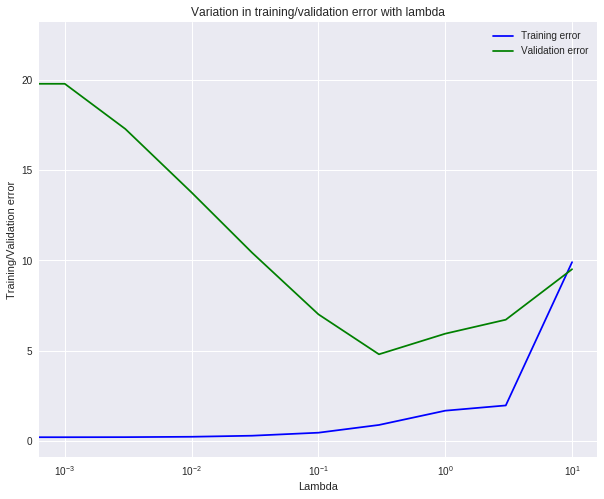

In [19]:
# The validation_curve function helps in determining the best lambda using a
# a validation set

def validation_curve(X,y,Xval,yval):
  
  reg_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
  error_train = np.zeros((len(reg_vec),))
  error_val = np.zeros((len(reg_vec),))
  
  for i in range(len(reg_vec)):
      reglinear_reg = RegularizedLinearReg_SquaredLoss()
      theta_opt = reglinear_reg.train(X,y,reg=reg_vec[i],num_iters=100000)
      print "Theta at reg", reg_vec[i], theta_opt
      error_train[i] = reglinear_reg.loss(theta_opt,X,y,0.0)
      error_val[i] = reglinear_reg.loss(theta_opt,Xval,yval,0.0)


  return reg_vec, error_train, error_val

def plot_lambda_selection(reg_vec,error_train,error_val):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  plt.plot(reg_vec,error_train,'b-',reg_vec,error_val,'g-')
  plt.title('Variation in training/validation error with lambda')
  plt.xlabel('Lambda')
  plt.ylabel('Training/Validation error')
  plt.legend(["Training error","Validation error"])
  ax.set_xscale('log')
  
reg_vec, error_train, error_val = validation_curve(XX_poly,y,XX_poly_val,yval)
plot_lambda_selection(reg_vec,error_train,error_val)


### Plotting learning curves with randomly selected examples 
In practice, especially for small training sets, when you plot learning curves
to debug your algorithms, it is often helpful to average across multiple sets
of randomly selected examples to determine the training error and 
validation error.
To determine the training error and cross validation error for
$i$ examples, we first randomly select $i$ examples from the training set
and $i$ examples from the  validation set. We then learn the model parameters using the randomly chosen training set and evaluate the parameters on the randomly chosen training set and validation set. The above
steps are  repeated multiple times (say 50) and the averaged error
is used to determine the training error and cross validation error for
$i$ examples.

Optimization terminated successfully.
         Current function value: 25.659237
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.007239
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.002512
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 25.314576
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.002512
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.070596
         Iterations: 10
         Function evaluations: 11


         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 9.362127
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 4.743745
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 11.630332
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 5.817699
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 10.500740
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 11.964679
         Iterations: 19

Optimization terminated successfully.
         Current function value: 6.784528
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 8.175789
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 8.133917
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 7.258357
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 7.435408
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 7.427034
         Iterations: 19
         Function evaluations: 20
  

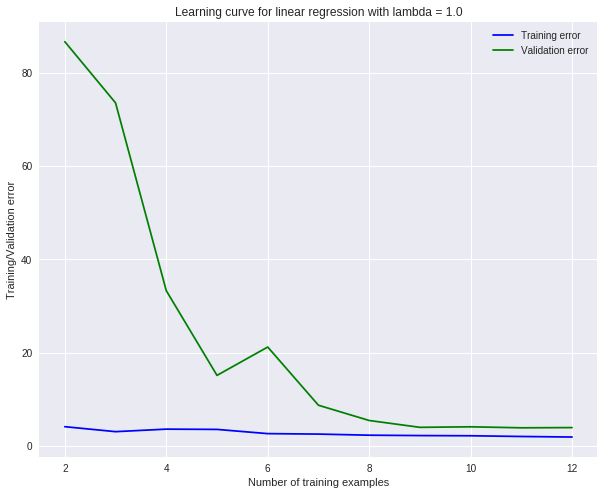

In [22]:
# Here is the averaged learning curve function 
# The script runs this function, plots the curves 

import random

def averaged_learning_curve(X,y,Xval,yval,reg):
    num_examples,dim = X.shape
    error_train = np.zeros((num_examples,))
    error_val = np.zeros((num_examples,))
    for i in range(1,num_examples):
        error_train[i] = 0
        error_val[i] = 0
        for j in range(50):
            train_ind = random.sample(np.arange(num_examples),i+1) 
            trainX = X[train_ind]
            trainy = y[train_ind]
            reglinear_reg = RegularizedLinearReg_SquaredLoss()
            theta_opt = reglinear_reg.train(trainX,trainy,reg=reg,num_iters=100000)
            error_train[i] = reglinear_reg.loss(theta_opt,trainX,trainy,0.0) + error_train[i]
            error_val[i] = reglinear_reg.loss(theta_opt,Xval,yval,0.0) + error_val[i]

        error_train[i] = error_train[i]/50.
        error_val[i] = error_val[i]/50.
    return error_train, error_val

reg = 1.0
error_train,error_val = averaged_learning_curve(XX_poly,y,XX_poly_val,yval,reg)
plot_learning_curve(error_train,error_val,reg)

### Extra Credit: Building regularized models for the Boston housing data set 
Perform a bias variance analysis of the Boston housing data set with the thirteen predictors, following the steps on the simple data set above. Use sklearn's  built-in functions to split the data into training, validation and test sets. What is the lowest achievable error on the test set with $\lambda = 0$? Select the best value for $\lambda$ and report the test set error with the best $\lambda$. Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. What is the test set error with quadratic features with the best $\lambda$ chosen with the validation set? What is the test set error with cubic features with the best $\lambda$ chosen with the validation set?  Present your results analytically with plots to support your findings. Discuss the impact of regularization for building good models for the Boston housing data set.

In [0]:
### TODO: your Boston code here 